# KNN (K-Nearest Neighbor)
- Implementation KNN with Numpy

In [3]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# create 10*2 array with Uniform distribution
random_generator = np.random.RandomState(42)
dataset = random_generator.rand(10, 2)
dataset

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

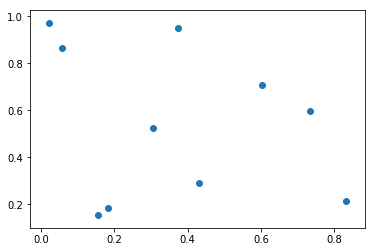

In [5]:
# plotting
x, y = dataset[:, 0], dataset[:, 1]
plt.scatter(x, y)

---
## Euclidean Distance
두 점 $v_1 = (x_1, y_1), v_2 = (x_2, y_2)$가 주어졌을 때, 

두 점 사이의 거리 $\text{dist}(v_1, v_2)=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$이다.

dataset은 $\{v_1, v_2, ..., v_10\}$이고, 가까운 데이터와의 거리를 재기 위해서,
 - $v_1$에 대하여, $\text{dist}(v_1, v_2), \text{dist}(v_1, v_3), ..., \text{dist}(v_1, v_{10})$
 - $v_2$에 대하여, $\text{dist}(v_2, v_1), \text{dist}(v_2, v_3), ..., \text{dist}(v_2, v_{10})$
 - $v_{10}$에 대하여, $\text{dist}(v_{10}, v_1), \text{dist}(v_{10}, v_2), ..., \text{dist}(v_{10}, v_1)$
 
를 각각 구해야 한다.

이를 계산하기 위해서 broadcasting 기능을 활용한다.

# 1-1. Vector간 Difference

In [6]:
# 기준이 되는 행을 개별 평면으로 할당함
row = dataset.reshape(10, 1, 2)
row

array([[[0.37454012, 0.95071431]],

       [[0.73199394, 0.59865848]],

       [[0.15601864, 0.15599452]],

       [[0.05808361, 0.86617615]],

       [[0.60111501, 0.70807258]],

       [[0.02058449, 0.96990985]],

       [[0.83244264, 0.21233911]],

       [[0.18182497, 0.18340451]],

       [[0.30424224, 0.52475643]],

       [[0.43194502, 0.29122914]]])

In [7]:
# 기준행과 연산을 해야 하는 데이터셋을 할당함
other_rows = dataset.reshape(1, 10, 2)
other_rows

array([[[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615],
        [0.60111501, 0.70807258],
        [0.02058449, 0.96990985],
        [0.83244264, 0.21233911],
        [0.18182497, 0.18340451],
        [0.30424224, 0.52475643],
        [0.43194502, 0.29122914]]])

In [8]:
print("row Shape", row.shape)
print("other_rows Shape", other_rows.shape)

row Shape (10, 1, 2)
other_rows Shape (1, 10, 2)


In [9]:
differences = row - other_rows
differences[:2]

array([[[ 0.        ,  0.        ],
        [-0.35745382,  0.35205582],
        [ 0.21852148,  0.79471979],
        [ 0.31645651,  0.08453816],
        [-0.22657489,  0.24264173],
        [ 0.35395562, -0.01919555],
        [-0.45790252,  0.7383752 ],
        [ 0.19271515,  0.7673098 ],
        [ 0.07029788,  0.42595787],
        [-0.0574049 ,  0.65948517]],

       [[ 0.35745382, -0.35205582],
        [ 0.        ,  0.        ],
        [ 0.5759753 ,  0.44266396],
        [ 0.67391033, -0.26751766],
        [ 0.13087893, -0.10941409],
        [ 0.71140945, -0.37125137],
        [-0.1004487 ,  0.38631937],
        [ 0.55016897,  0.41525397],
        [ 0.4277517 ,  0.07390205],
        [ 0.30004892,  0.30742934]]])

In [10]:
differences.shape

(10, 10, 2)

## broadcasting
- row        : (10, 1, 2) → (10, 10, 2)
- other_rows : (1, 10, 2) → (10, 10, 2)


<img src="./ref/KNN_braodcasting_image.jpg">

# 1-2. differences의 제곱

In [22]:
sq_differences = differences ** 2
sq_differences[:2]

array([[[0.00000000e+00, 0.00000000e+00],
        [1.27773236e-01, 1.23943302e-01],
        [4.77516365e-02, 6.31579538e-01],
        [1.00144721e-01, 7.14670060e-03],
        [5.13361821e-02, 5.88750085e-02],
        [1.25284584e-01, 3.68468977e-04],
        [2.09674720e-01, 5.45197930e-01],
        [3.71391297e-02, 5.88764324e-01],
        [4.94179135e-03, 1.81440111e-01],
        [3.29532252e-03, 4.34920684e-01]],

       [[1.27773236e-01, 1.23943302e-01],
        [0.00000000e+00, 0.00000000e+00],
        [3.31747548e-01, 1.95951385e-01],
        [4.54155132e-01, 7.15656993e-02],
        [1.71292943e-02, 1.19714439e-02],
        [5.06103402e-01, 1.37827578e-01],
        [1.00899411e-02, 1.49242658e-01],
        [3.02685901e-01, 1.72435863e-01],
        [1.82971516e-01, 5.46151337e-03],
        [9.00293563e-02, 9.45128016e-02]]])

# 1-3. 제곱의 합

In [23]:
sq_differences = sq_differences.sum(-1)
sq_differences[:2]

array([[0.        , 0.25171654, 0.67933117, 0.10729142, 0.11021119,
        0.12565305, 0.75487265, 0.62590345, 0.1863819 , 0.43821601],
       [0.25171654, 0.        , 0.52769893, 0.52572083, 0.02910074,
        0.64393098, 0.1593326 , 0.47512176, 0.18843303, 0.18454216]])

# 1-4. root

In [24]:
distances = np.sqrt(sq_differences)
distances[:2]

array([[0.        , 0.5017136 , 0.82421549, 0.32755369, 0.33198071,
        0.35447574, 0.86883407, 0.7911406 , 0.4317197 , 0.66197886],
       [0.5017136 , 0.        , 0.72642889, 0.72506609, 0.17058938,
        0.8024531 , 0.39916488, 0.68929077, 0.43408873, 0.4295837 ]])

In [27]:
nearest_o = np.argsort(distances, axis=1)
nearest_o

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]], dtype=int64)

- 두번째 결과는 [1, 4, 6, 9, 8, 0, 7, 3, 2, 5]
  - 가장 가까운 entry index = 1 (자기자신)
  - 두번째로 가까운 entry index = 4 (자신을 제외한 가장 가까운 값)
  
  
- nearest 모든행의 첫번째 값은 자기자신을 나타내는 인덱스이므로
  - index 1~k+1까지의 값을 추출하면 인접하는 k개의 점을 구할 수 있다.

# 1-5. $k$개 이웃 선정

In [28]:
# k = 2
k = 2
knn = nearest_o[:, 1:k+1]
knn

array([[3, 4],
       [4, 6],
       [7, 9],
       [5, 0],
       [1, 0],
       [3, 0],
       [1, 9],
       [2, 9],
       [9, 4],
       [8, 7]], dtype=int64)

# 1-6. Plot
- $v1$과 가장 가까운 데이터는 $v4$, $v5$

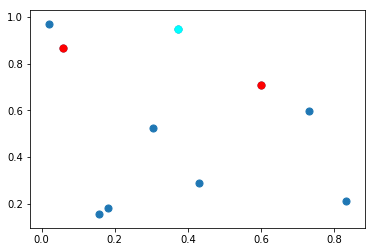

In [36]:
plt.scatter(x, y, s=50)
plt.scatter(dataset[0][0], dataset[0][1], c='cyan', s=50) # v1
nearest = dataset[knn[0]] # v4, v5
plt.scatter(nearest[:, 0], nearest[:, 1], c='r', s=50)

- $v10$과 가장 가까운 데이터는 $v9$, $v8$

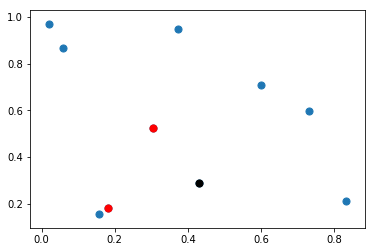

In [37]:
plt.scatter(x, y, s=50)
plt.scatter(dataset[9][0], dataset[9][1], c='k', s=50) # v10
nearest = dataset[knn[9]] # v9, v8
plt.scatter(nearest[:, 0], nearest[:, 1], c='r', s=50)

# 2. 함수로 정의

In [62]:
def knn(dataset, k):
    dist = np.sqrt(np.sum((dataset[:, np.newaxis, :] - dataset[np.newaxis, :, :]) ** 2, axis=-1))
    near = np.argpartition(dist, k+1, axis=1)
    size = len(dataset)
    mask = np.arange(size).reshape(size, 1)
    result = near[near!=mask].reshape(size, -1)
    
    return result[:, :k]

In [63]:
knn(dataset, 2)

array([[3, 4],
       [4, 6],
       [7, 9],
       [5, 0],
       [1, 0],
       [3, 0],
       [1, 9],
       [2, 9],
       [9, 4],
       [8, 7]], dtype=int64)